### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

Media birra: 106.16
Media vino: 49.45
Media distillati: 80.99
                country  alcohol_index
15              Belarus     185.666667
98            Lithuania     214.333333
3               Andorra     231.666667
68              Grenada     221.666667
61               France     216.000000
45       Czech Republic     221.666667
141  Russian Federation     215.333333
99           Luxembourg     213.333333
155            Slovakia     201.666667
81              Ireland     198.666667
   country  alcohol_index
3  Andorra     231.666667
                country  beer_servings
15              Belarus            142
98            Lithuania            343
3               Andorra            245
68              Grenada            199
61               France            127
45       Czech Republic            361
141  Russian Federation            247
99           Luxembourg            236
155            Slovakia            196
81              Ireland            313


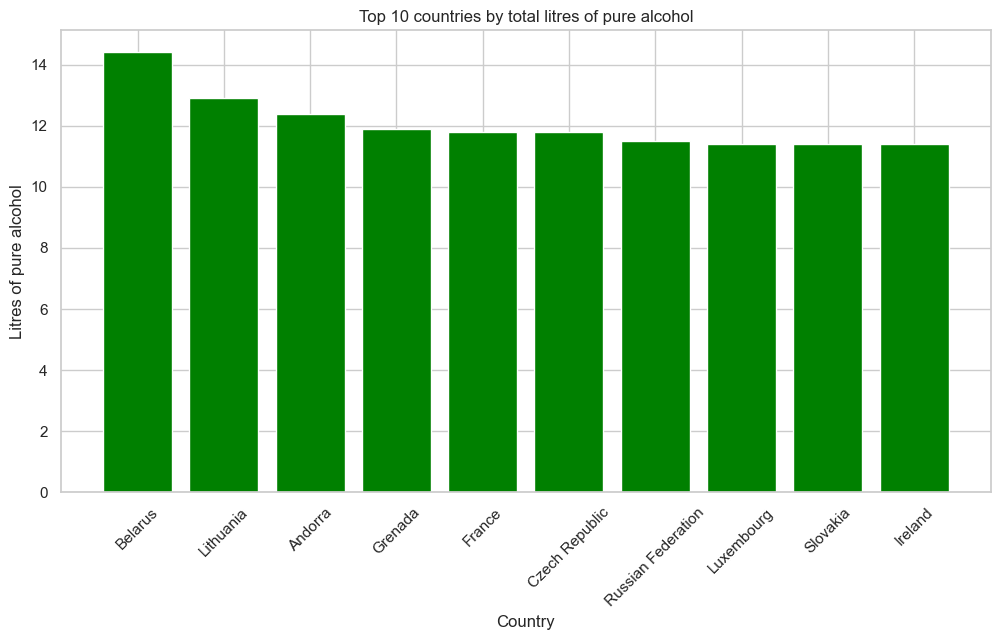

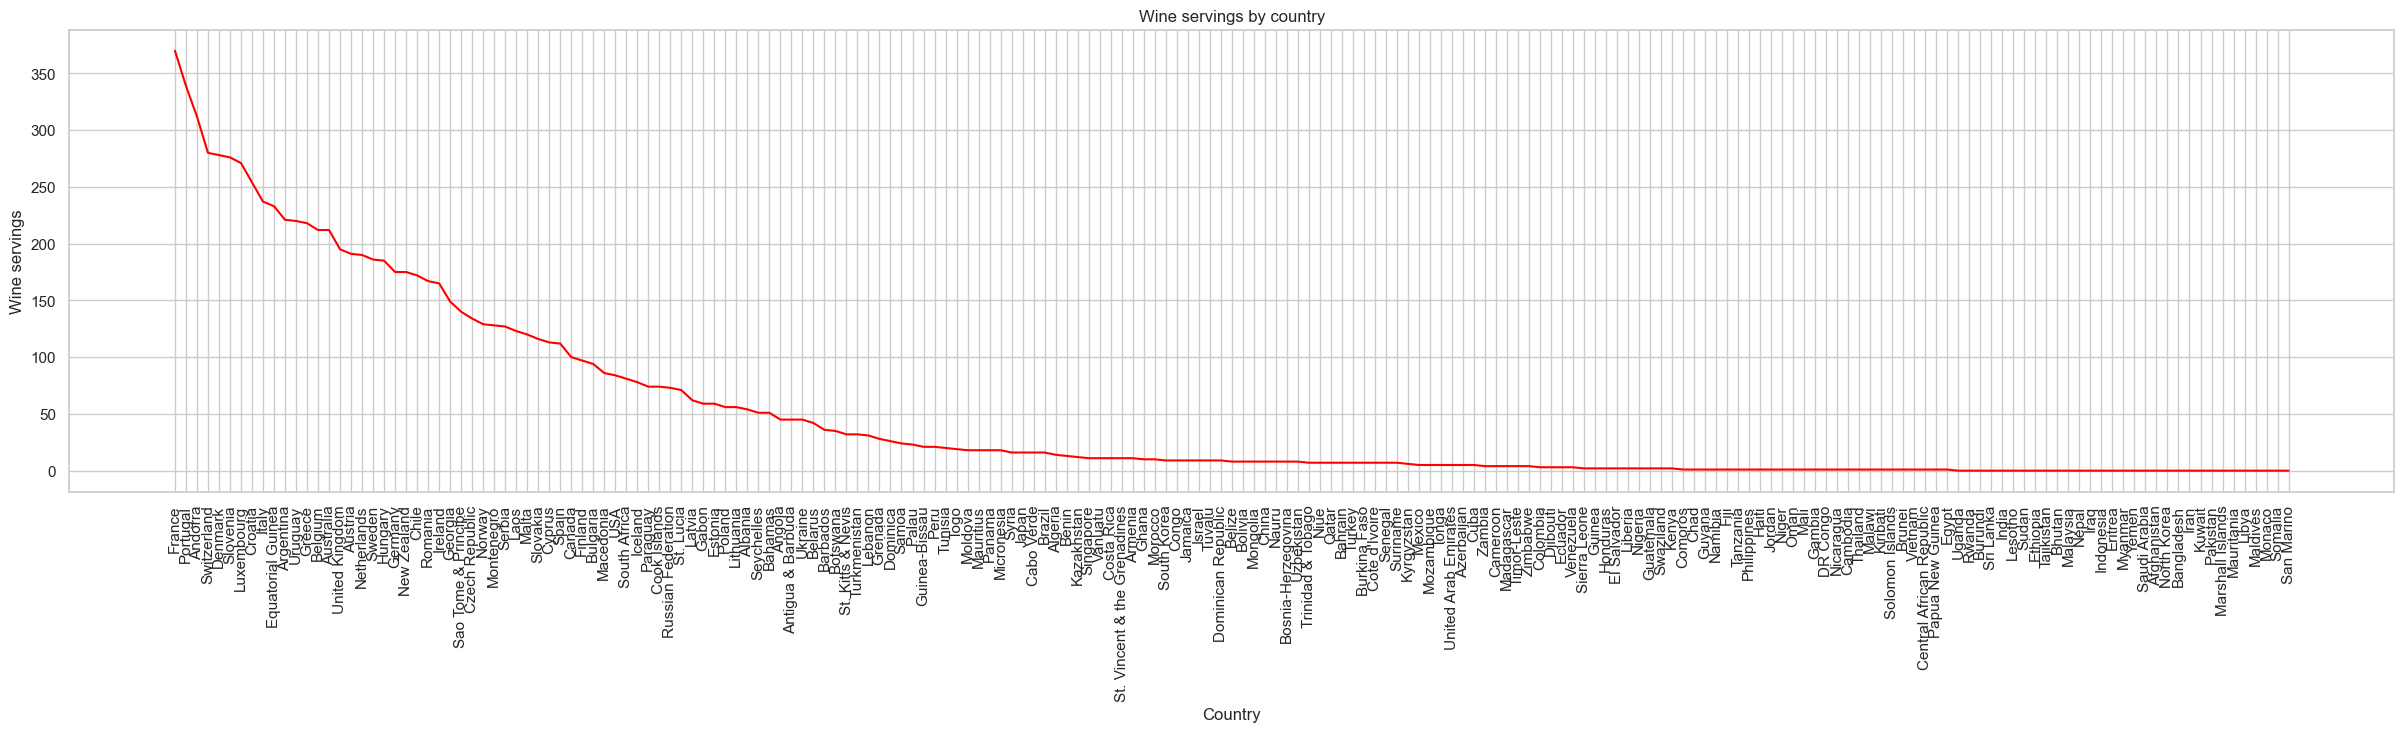

In [21]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")

#Punto 1 - Visualizzare i primi 10 paesi ordinati per total litres of pure alcohol
df.sort_values(by='total_litres_of_pure_alcohol', ascending=False, inplace=True)
#print(df.head(10))

#Punto 2 - Calcolare la media del consumo di birra, vino e distillati
beer = df["beer_servings"].mean() #Media birra
wine = df["wine_servings"].mean() #Media vino
spirits = df["spirit_servings"].mean() #Media distillati
print(f"Media birra: {beer:.2f}")
print(f"Media vino: {wine:.2f}")
print(f"Media distillati: {spirits:.2f}")

#Punto 3 - Creare una nuova colonnna che calcola il consumo totale di alcol per paese facendo una media ponderata
for i in range(len(df)):
    df.loc[i, 'alcohol_index'] = (df.loc[i, 'beer_servings'] + df.loc[i, 'wine_servings'] + df.loc[i, 'spirit_servings']) / 3
print(df[['country', 'alcohol_index']].head(10))

#Punto 4 - Trovare il paese con il consumo totale di alcol più alto
m = df['alcohol_index'].max()
print(df[['country', 'alcohol_index']].loc[df['alcohol_index'] == m])

#Punto 5 - Filtrare i paesi che hanno un consume di birra maggiore di 100 all'anno
df_beer = df.loc[df['beer_servings'] > 100]
print(df_beer[['country', 'beer_servings']].head(10))

#Creo un bar chart dei 10 paesi con il consumo maggiore di total litres of pure alcohol
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df['country'].head(10), df['total_litres_of_pure_alcohol'].head(10), color='Green')
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Litres of pure alcohol")
plt.title("Top 10 countries by total litres of pure alcohol")
plt.show()

#Creo un line plot con wine_servings ordinato per paese

#Ordino per wine_servings il dataframe
df_ordered_wine = df.sort_values(by='wine_servings', ascending=False)

#Creo il plot
plt.figure(figsize=(30, 6))
plt.plot(df_ordered_wine['country'], df_ordered_wine['wine_servings'], color='Red')
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Wine servings")
plt.title("Wine servings by country")
plt.show()


### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg',
       'company_name', 'job_skills', 'job_type_skills'],
      dtype='object')
job_country
Belarus    400000.0
Russia     292500.0
Name: salary_year_avg, dtype: float64
job_country
United States    206292
India             51088
Name: count, dtype: int64
                 min       max
job_country                   
Afghanistan      NaN       NaN
Albania      43200.0  157500.0


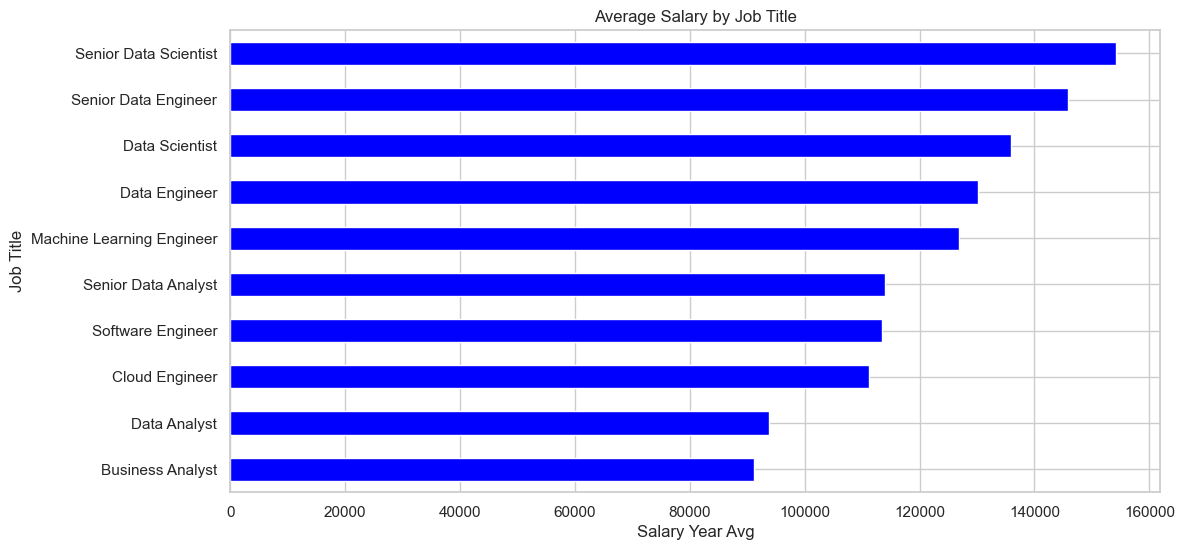

In [ ]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
print(df.columns)

#Punto 1 - Per ogni paese analizzare stimendio medio annuale
salary_avg_country = df.groupby('job_country')['salary_year_avg'].mean() #Calcolo stipendio medio per paese
print(salary_avg_country.sort_values(ascending=False).head(2)) #Visualizzo i primi 10 paesi ordinati per stipendio medio
job_avg_country = df['job_country'].value_counts() #Calcolo numero di lavori per paese
print(job_avg_country.head(2)) #Visualizzo i primi 10 paesi ordinati per numero di lavori
salary_avg_country = df.groupby('job_country')['salary_year_avg'].agg(['min', 'max']) #Calcolo stipendio medio e numero di lavori per paese
print(salary_avg_country.head(2))


#Rappresentazione grafica con barre orizzontali
import matplotlib.pyplot as plt
salary_avg_job = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=True) #Calcolo stipendio medio per lavoro

plt.figure(figsize=(12, 6))
salary_avg_job.plot(kind='barh', color='Blue')
plt.xlabel('Salary Year Avg')
plt.ylabel('Job Title')
plt.title('Average Salary by Job Title')
plt.show()

#Per migliorare il codice, bisogna sostituire i NaN con il tipo np.NaN e poi calcolare la media 
#sostituendo i NaN, con un tipo di dato coerente con le operazioni che si vogliono fare.
